# Núcleos de convolución no lineales

$$\max \left(\sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n y_i b_i k(x_i, x_j) y_j b_j\right)$$

sujeto a las restricciones
$$\sum_{i=1}^n b_i y_i = 0$$
$$0\le b_i\le \frac{1}{2n\gamma}$$

$k$ se denomina el núcleo (**kernel**) de la SVM
- Caso lineal $k(x_i,x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j) = \phi(x_i)\cdot \phi(x_j)$

- Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma||x_i-x_j||^2}$
- Predicción: $k(x_i, p_j) = e^{-\gamma||x_i-p_j||^2}$

- Kernel polinomial homogéneo: $k(x_i, x_j)= (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $(x_i, x_j)= (x_i\cdot x_j +1)^d$
- Kernel de tangente hiperbólica: $(x_i, x_j)= tanh(a x_i\cdot x_j +k)$

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [150]:
session = tf.Session()

In [151]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=0.5, noise=0.1)

In [152]:
x_vals

array([[-2.74284032e-01, -3.42891705e-01],
       [ 7.67877710e-01,  1.90510578e-01],
       [-4.44505664e-02, -9.37734688e-01],
       [-5.88843753e-01,  2.26864896e-02],
       [ 5.51610544e-01,  1.78092713e-01],
       [ 3.87512825e-01,  4.08932481e-01],
       [ 8.16714736e-01,  4.47896250e-01],
       [ 7.38681980e-01, -6.54601550e-01],
       [ 7.79475923e-01, -3.72919758e-01],
       [ 1.13176237e-01,  9.77830914e-01],
       [ 9.11061074e-02,  3.68174358e-01],
       [ 8.47099852e-02, -6.12919928e-01],
       [-1.00195419e+00,  4.14702892e-01],
       [-5.16009354e-02, -1.04580072e+00],
       [-2.07364874e-01, -5.20597046e-01],
       [ 7.72405546e-01,  6.63481331e-01],
       [-6.98376611e-01,  3.19411801e-01],
       [ 3.72264097e-01, -4.12305961e-02],
       [ 3.09621003e-01, -3.72775069e-01],
       [ 4.45501354e-01, -9.70028878e-01],
       [-8.47099746e-01, -6.37104568e-01],
       [ 4.86354409e-01, -3.16594884e-02],
       [ 2.92653393e-01,  6.47272953e-01],
       [ 5.

In [153]:
y_vals

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [154]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

In [155]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i]==-1]

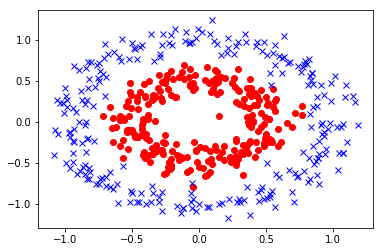

In [156]:
plt.plot(class1_x, class1_y, 'ro', label = "Clase 1")
plt.plot(class2_x, class2_y, 'bx', label = "Clase 2")
plt.show()

In [157]:
batch_size = 500
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype = tf.float32)
b = tf.Variable(tf.random_normal(shape=[1, batch_size]))

In [158]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), 
                     tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

In [159]:
first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

In [160]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid),1), [-1,1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [161]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [162]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [163]:
my_optim = tf.train.GradientDescentOptimizer(0.002)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [164]:
loss_vect = []
batch_acc = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    
    acc_temp = session.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_acc.append(acc_temp)
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+ ", Pérdida = "+str(temp_loss)+", Precisión = "+str(acc_temp))

Paso #50, Pérdida = 297.6938, Precisión = 0.616
Paso #100, Pérdida = 193.76442, Precisión = 0.654
Paso #150, Pérdida = 127.63546, Precisión = 0.666
Paso #200, Pérdida = 82.52175, Precisión = 0.7
Paso #250, Pérdida = 55.921673, Precisión = 0.694
Paso #300, Pérdida = 30.179745, Precisión = 0.678
Paso #350, Pérdida = 11.343565, Precisión = 0.79
Paso #400, Pérdida = 19.955114, Precisión = 0.854
Paso #450, Pérdida = -2.9944973, Precisión = 0.884
Paso #500, Pérdida = -2.552742, Precisión = 0.926
Paso #550, Pérdida = -8.323643, Precisión = 0.95
Paso #600, Pérdida = -8.594389, Precisión = 0.962
Paso #650, Pérdida = -10.872988, Precisión = 0.978
Paso #700, Pérdida = -10.825632, Precisión = 0.998
Paso #750, Pérdida = -10.686528, Precisión = 0.984
Paso #800, Pérdida = -10.959295, Precisión = 0.982
Paso #850, Pérdida = -11.965466, Precisión = 0.976
Paso #900, Pérdida = -13.1035385, Precisión = 0.996
Paso #950, Pérdida = -13.396959, Precisión = 0.99
Paso #1000, Pérdida = -12.872538, Precisión = 0.9

In [165]:
x_min, x_max = x_vals[:,0].min()-1, x_vals[:,0].max()+1
y_min, y_max = x_vals[:,1].min()-1, x_vals[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]

In [166]:
grid_points

array([[-2.08415018, -2.17065097],
       [-2.06415018, -2.17065097],
       [-2.04415018, -2.17065097],
       ...,
       [ 2.13584982,  2.22934903],
       [ 2.15584982,  2.22934903],
       [ 2.17584982,  2.22934903]])

In [167]:
[grid_predictions] = session.run(prediction, feed_dict={x_data: x_vals,
                                                   y_target: np.transpose([y_vals]),
                                                   prediction_grid: grid_points})

In [168]:
grid_predictions

array([-1., -1., -1., ..., -1., -1., -1.], dtype=float32)

In [169]:
grid_predictions = grid_predictions.reshape(xx.shape)

In [170]:
grid_predictions

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

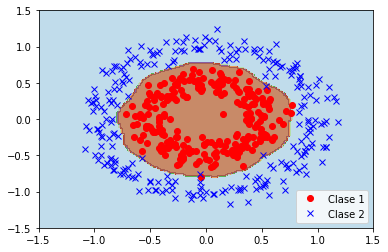

In [174]:
plt.contourf(xx,yy, grid_predictions, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, 'ro', label="Clase 1")
plt.plot(class2_x, class2_y, 'bx', label="Clase 2")
plt.legend(loc="lower right")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

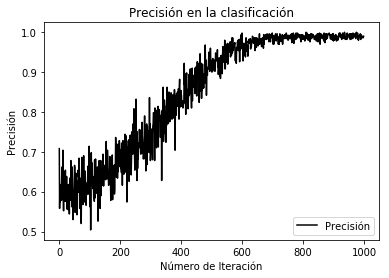

In [175]:
plt.plot(batch_acc, 'k-', label="Precisión")
plt.title("Precisión en la clasificación")
plt.xlabel("Número de Iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.show()

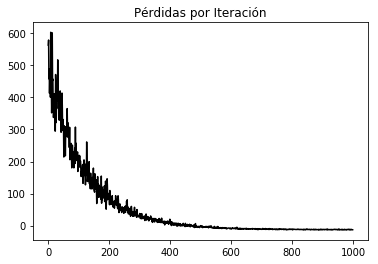

In [176]:
plt.plot(loss_vect, 'k-')
plt.title("Pérdidas por Iteración")
plt.show()

In [180]:
import sympy
sympy.binomial(4,1)

4